### TMA4215 Numerisk Matematikk 

Høst 2021 – September 16, 2021

# Project 1: Newton Iteration

### Notes

This project is an individual project and should be solved that way. You can discuss the problems, but you should write the solutions _in your own words_.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

The notebook with the answers should be uploaded in inspera.

The project is obligatory and counts 10% on the final grade.

### Submission Deadline
Tuesday, October 5, 2021, 23:59.

## Introduction
This project considers the Newton iteration for the $n$-dimensional nonlinear equation

$$ \mathbf F(\mathbf x) = \mathbf 0, $$

i.e. $\mathbf F\colon \mathbb R^n \to \mathbb R^n$. For the first two problems, we will consider the multivariate case. For the implementation, we stay with $n=1$.

## Problem 1

1. Compute the gradient $\nabla F$ and the Hessian $H_F$ of the Rosenbrock function $F\colon \mathbb R^2 \to \mathbb R$ defined by $F(\mathbf x) = 100(x_2-x_1^2)^2 + (1-x_1)^2$.
   Show that $\mathbf x^* = (1,1)^\mathrm{T}$ is the only local minimizer of this function and that the Hessian matrix at this point is positive definite.

We can compute the gradient, find the only local minimizer and then compute the Hessian.

Gradient:
$$
\nabla F= (\frac{\partial F}{\partial x}, \frac{\partial F}{\partial y})^T =
\begin{bmatrix}
400(x_1^3-x_2x_1)\\ 
200(x_2-x_1^2) \\
\end{bmatrix}
$$

Local minimizer:
Set $\nabla F=0$ and obtain the two equations
$$
400(x_1^3-x_2x_1)=0
200(x_2-x_1^2)=0
$$
yielding that 
$$
x_1=x_2=1
$$
hence the only local minimizer must be $(1, 1)$

Hessian:
$$
H_F = \nabla ^2 F = 
\begin{bmatrix}
\frac{\partial^2 F}{\partial^2 x} & \frac{\partial^2 F}{\partial x \partial y}\\ 
\frac{\partial^2 F}{\partial y \partial x} & \frac{\partial^2 F}{\partial^2 y}\\
\end{bmatrix} = 
\begin{bmatrix}
400(3x_1-x_2) + 2 & -400x_1\\ 
-400x_1 & 200\\
\end{bmatrix}
$$

2. Show that the function $G\colon \mathbb R^2 \to \mathbb R$ defined by $G(\mathbf x) = 8x_1 + 12x_2 + x_1^2-2x_2^2$ has one stationary point which is neither a maximum nor a minimum.

So we first find the gradient that gives us the stationary point, and then use the second-derivative test to determine the nature of the stationary point. 

$$
\nabla G = 
\begin{bmatrix}
8+2x_1\\ 
12-4x_2\\
\end{bmatrix}
\rightarrow
x_1=-4, x_2=3
$$
So stationary point is $(-4, 3)$
Furthermore the second derivative test yields:
$$
D=\frac{\partial ^2G}{\partial ^2x} \times \frac{\partial ^2G}{\partial ^2y} - (\frac{\partial ^2G}{\partial x \partial y})^2
$$
And states that if $D<0$ it is a sadle point.
So we compute
$$
D=2*(-4)-0^2 = -8
$$
Hence $(-4, 3)$ is a sadle point, not a local maximum or local minimum

3. Use `matplotlib`s `pyplot` to plot `contour` plots on the unit square $\Omega_1 = [-1,1]^2$ for $F_1$ and on the unit square $\Omega_2 = [-10,10]^2$ for $G$.

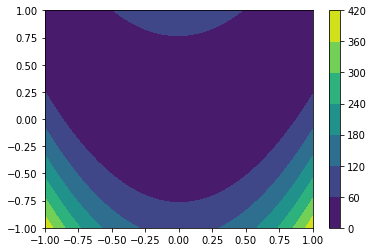

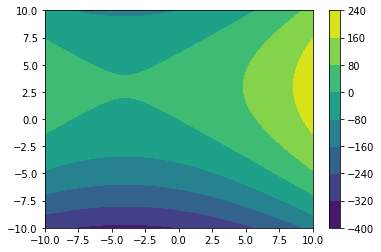

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def F(x1, x2):
    return 100*((x2-x1**(2))**(2)) + (1-x1)**2

def G(x1, x2):
    return 8*x1 + 12*x2 + x1**2 - 2*x2**(2)

x1F = np.linspace(-1, 1, 100)
x2F = np.linspace(-1, 1, 100)

x1G = np.linspace(-10, 10, 100)
x2G = np.linspace(-10, 10, 100)

X1F, X2F = np.meshgrid(x1F, x2F)
ZF = F(X1F, X2F)

X1G, X2G = np.meshgrid(x1G, x2G)
ZG=G(X1G, X2G)

plt.figure(0)
plt.contourf(X1F, X2F, ZF)
plt.colorbar()
plt.show()
plt.figure(1)
plt.contourf(X1G, X2G, ZG)
plt.colorbar()
plt.show()

## Problem 2

Let $A \in \mathbb R^{n \times n}$ be symmetric.
The Rayleigh quotient $F\colon \mathbb R^n \to \mathbb R$ for $A$ is defined as
    
$$ F(\mathbf x) = \frac{\mathbf x^T\! A \mathbf x}{\lVert \mathbf x\rVert_2^2}.$$

The goal of this problem is to analyze Newton's method for finding minimizer (or stationary points) $\mathbf x^\ast$ of $F$ or in other words zeros of the gradient $\nabla F(\mathbf x) = \mathbf 0$.

To this end:

1. Compute the gradient $\nabla F$.
2. What are the stationary points $\mathbf x^\ast$ of $F$? What is the value of $F(\mathbf x^\ast)$ then?
3. Show that the Hessian matrix $\nabla^2 F$ (i.e. the Jacobian of the Gradient $\nabla F$) satisfies
   
   $$\nabla^2 F(\mathbf x) = \frac{2}{\lVert \mathbf x \rVert_2^2}
	\Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    \Bigl(A - F(\mathbf x) I\Bigr)
    \Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)$$
   
   _Hint_: Start with the directional derivative into a direction $z$, i.e. $(\nabla^2 F(x))z$.
4. Assume during the iterations of a the _Newton Method_ descent we reach nearly an Eigenvector of $A$.
   Then for $\mathbf x$ an Eigenvector we are looking for a descent direction by solving the Newton equation
    
   $$\nabla^2 F(\mathbf x) \, d = - \nabla F(\mathbf x)$$
   
   To what does the solution of this equation simplify in this case?
5. What does the Newton iteration look like for the situation in 4?
6. Interpret the result from 5 and analyze what the reason for this behavior is.

##### In this task all x are a vector, but due the trouble of writing them in LaTex I have chosen not to write them as $\mathbf x$ but simply as $x$

I have seen many different approaches to matrix calculus but I found the one used below both more simple and clean. Hence the choice of derivation. Not all steps are included in each derivation as I did not find it necessary. Furthermore I expect there not to be any need for in depth explanation of how things are done as I am certain the person grading this has far more knowledge than me.

1)
Let 
$$
F(x)=\frac{u(x)}{v(x)} \\
u(x)=x^TAx \\
v(x)=x^Tx=\lVert x \rVert_2^2
$$
so we get 
$$
u(x+z)=u(x)+\nabla u(x)z + O(\lVert z \rVert^2) = x^TAx + 2x^TAz + z^TAz \\ 
v(x+z)=v(x) +\nabla v(x)z + O(\lVert z \rVert^2) = x^Tx + 2x^Tz + z^Tz
$$
s.t
$$
\nabla u(x)=2x^TA \\
\nabla v(x)=2x^T
$$
Apply derivative of $\frac{d}{dx}\frac{u}{v}=\frac{vu' - uv'}{v^2}$ and obtain 
$$
\nabla \frac{u}{v} = \nabla F = \frac{x^Tx(2x^TA)-x^TAx(2x^T)}{(x^Tx)^2} = \frac{2}{x^Tx}(x^TA-x^TF(x)I)=\frac{2}{x^Tx}(Ax-F(x)I x)
$$
where we multiply F(x) by the identity matrix to make sure the subraction happens in the correct dimensions
##### q.e.d.
2)
So we see that for $\nabla F=0=\frac{2}{x^Tx}(x^TA-x^TF(x))$ we must have
$$
Ax-xF(x)=0
$$ 
which we recognize as being the solution to $det(A-\lambda I)=0$
and since $F$ is stationary we know that our lamba is a constant so we can say $F(\mathbf x^\ast)=\lambda=constant$
$$
Ax-xF(\mathbf x^\ast)=0
$$
meaning that all stationary points are found in the eigenvector and the value of each point corresponds to the eigenvalues.
##### q.e.d.
3)
So we start by dividing the gradient in two terms and do them seperately, so for the first term we use the quotient rule
$$
\nabla (\frac{2x^TA}{x^Tx}) = 2A \frac{x^Tx - x2x^T}{(x^Tx)^2}
$$
for the second term we use the product rule, since we notice that we have already computed the derivative of the term $\frac{2x}{x^Tx}$ above.
$$
\nabla (\frac{2F(x)x}{x^Tx})= 2\left( \left(\frac{x^Tx - x2x^T}{(x^Tx)^2}\right)F(x)I + \frac{x}{x^Tx} \nabla F(x) I \right)= 2 \left(\frac{x^Tx - x2x^T}{(x^Tx)^2}\right)F(x)I + \frac{2x}{x^Tx}\frac{2}{x^Tx}\left (x^TA-x^TF(x)\right)
$$
So by collecting some terms and making the expression more readable, we obtain 
$$
\frac{2}{x^Tx}\left(A-\frac{2Axx^T}{x^Tx} - F(x)I + \frac{2xx^T}{x^Tx}F(x)I - \frac{2xx^TA}{x^Tx} + \frac{2xx^T}{x^Tx}F(x)I \right)
$$
Now i tried putting this together to match the expression above, but found this to be a bit more difficult than expected. The simpler solution is expanding the expression above and see if it matches. 
So we expand the expression to find
   $$\nabla^2 F(\mathbf x) = \frac{2}{\lVert \mathbf x \rVert_2^2}
	\Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    \Bigl(A - F(\mathbf x) I\Bigr)
    \Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr) \\
    \frac{2}{\lVert \mathbf x \rVert_2^2}
	\Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    \Bigl(A - F(\mathbf x) I\Bigr)
    \Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    $$
$$
= \frac{2}{x^Tx}\left(I-\frac{2xx^T}{x^Tx}\right)\left( A- \frac{2Axx^T}{x^Tx} - F(x)I + \frac{2F(x)xx^T}{x^Tx}\right) \\ 
$$
$$
=\frac{2}{x^Tx}\left(A-\frac{2xx^TA}{x^Tx} - F(x)I + \frac{2xx^TF(x)}{x^Tx} - \frac{2Axx^T}{x^Tx} + \frac{4xx^TAxx^T}{(x^Tx)^2} + \frac{2F(x)xx^T}{x^Tx} - \frac{4xx^TF(x)xx^T}{(x^Tx)^2}\right)
$$
At this step we notice that 
$$
\frac{4xx^TAxx^T}{(x^Tx)^2} = \frac{4xF(x)x^T}{x^Tx} \\
\frac{4xx^TF(x)xx^T}{(x^Tx)^2} = \frac{4xF(x)x^T}{x^Tx}
$$
So they cancel out and we are left with these two expressions, our computation and the given solution, respectively
$$
\frac{2}{x^Tx}\left(A-\frac{2Ax^Tx}{x^Tx} - F(x)I + \frac{2xx^T}{x^Tx}F(x)I - \frac{2xx^TA}{x^Tx} + \frac{2xx^T}{x^Tx}F(x)I \right) \\
\frac{2}{x^Tx}\left(A-\frac{2Ax^Tx}{x^Tx} - F(x)I + \frac{2xx^T}{x^Tx}F(x)I - \frac{2xx^TA}{x^Tx} + \frac{2xx^T}{x^Tx}F(x)I \right)
$$
They are equivalent so our goal was achieved! 
Note: We need not care about the order of multiplication of terms such as $\frac{2xx^T}{x^Tx}F(x)I$ and $\frac{2F(x)xx^T}{x^Tx}$ since $F(x)$ is a real number.
##### q.e.d.

4)
So we are to solve
$$
\nabla^2 F(x^*) \, d = - \nabla F(x^*)
$$
i.e. 
$$
\frac{2}{x^{*T}x^*}\left(A-\frac{2Ax^*x^{*T}}{x^{*T}x^*} - F(x^*)I + \frac{2x^*x^{*T}}{x^{*T}x^*}F(x^*)I - \frac{2x^*x^{*T}A}{x^{*T}x^*} + \frac{2x^*x^{*T}}{x^{*T}x^*}F(x^*)I \right)d =-\frac{2}{x^{*T}x^*}(Ax^*-F(x^*)I x^*) 
$$
As the stationary points of $F$, from task 2.2, are the eigenvectors of $A$, our gradient will in this case be zero. So we may reduce our equation as follows
$$
\frac{2}{x^{*T}x^*}\left(A-\frac{2Ax^*x^{*T}}{x^{*T}x^*} - F(x^*)I + \frac{2x^*x^{*T}}{x^{*T}x^*}F(x^*)I - \frac{2x^*x^{*T}A}{x^{*T}x^*} + \frac{2x^*x^{*T}}{x^{*T}x^*}F(x^*)I \right)d = 0
$$
Furthermore we notice that, from task 2.2 we have 
$$
(A- IF(x^*))x^* = 0
$$
So the second and fourth term will cancel eachother out. This leads us to
$$
\frac{2}{x^{*T}x^*}\left(A-\frac{2x^{*T}x^*A}{x^{*T}x^*} - F(x^*)I + \frac{2x^*x^{*T}}{x^{*T}x^*}F(x^*)I \right)d=0
$$
Firstly we see the solution $d=0$ to be trivial and we look for other solutions to the equation
$$
\left(A-\frac{2x^{*T}x^*A}{x^{*T}x^*} - F(x^*)I + \frac{2x^*x^{*T}}{x^{*T}x^*}F(x^*)I \right)d=0
$$
In compact form we obtain this to be
$$
\left( (A-F(x^*)I) + \frac{2x^*x^{*T}}{x^{*T}x^*}(A-F(x^*)I) \right)d
$$
Where we have cut off the part $\frac{2}{x^{*T}x^*}$ as it will not have any impact.

Using the fact that $A$ and $F(x)I$ are symmetric, and so will the sum be, we say that 
$$
(A- F(x^*)I)x^* = x^{*T}(A- F(x^*)I) = 0
$$
So we can simplify the latter parenthesis and obtain the following expression
$$
(A-F(x^*)I)d=0
$$
This equation is the same as for task 2.2, meaning that $d$ is equal to a multiple of the eigenvectors of $A$, i.e. $d=kx^*, k\in \mathbb{R}$, the stationary points of $F$.

As a sidenote one might also see that 
$$
d \in Null\{(A-F(x^*)I)\} = Ker\{(A-F(x^*)I)\}
$$
And that again from task 2.2 this is the same as 
$$
d \in Null\{(A-\lambda I)\} = Ker\{(A-\lambda I)\}
$$
So $d$ will send our function to its nullspace.

5)
The Newton Iteration for this problem will take the form
$$
x_{n+1} = x_n + d = x_n + kx^*
$$
As d notes the direction of where the minima is achieved

6)
We may say that when we have nearly found an eigenvector $x^*$ we will be guided in to a direction, which further leads us to a more and more accurate result as we iterate. By iterating enough until $x^{(k)}$ is close to an eigenvectors, the direction, $F(x)$ will in turn become closer the the eigenvalue of that direction, solving our problem by finding the root. 

## Problem 3

1. Implement a generic (simple) Newton iteration function of the form

       def my_newton(f, Df, x0, **kwargs)

   To look for a zero of the univariate function $f\colon \mathbb R \to \mathbb R$.
   Hence the function performs the newton iteration for `f` and its derivative `Df` starting from `x0` performing `maxiter` steps, where `maxiter` is a keyword argument from `**kwargs`.
   Provide a suitable default if no `maxiter` keyword is given.

2. Extend the function from the first part of this problem with an additional keyword `tol` to stop, if $\lvert f(x_k)\rvert$ is smaller in absolute value than the tolerance `tol`.
   What is a good default here to make the function work the same as in 1, i.e. that the default behavior (from 1) is not changed by this additional keyword?

3. Document the function properly.

4. Write at least two tests with simple functions. One should end with `maxiter` iterations, the other with a tolerance stop.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
def my_newton(f, Df, x0, **kwargs):
    
    count=0
    
    maxiter=kwargs.get("maxiter", 5000) #Had to research this ony my own as I had not encountered it before
    tol=kwargs.get("tol", 1e-12)
    
    x=x0 + 0 #Same reason as why we copy matrices
    
    for i in range(maxiter):
        df=Df(x)              
        if df==0:         #Check to see that we do not encounter a division by 0
            print("Not valid function for Newton iteration")
        count+=1
        fx=f(x)           #New function value
        xOld=x            #Storing our old x for iteration
        x=xOld-fx/df      #Actual iteration
        if abs(fx)<tol:
            return x
    ohno = "maxiter reached"
    return ohno, count, "f(x)=", fx

In [13]:
def f1(x):
    return x**(3) - np.sqrt(x)      #Simple, differentiable function

def df1(x):
    return 3*x**(2) - 1/(2*np.sqrt(x))

In [14]:
def f2(x):
    return x**(2)+1                 #Function without a root

def df2(x):
    return 2*x

In [19]:
Test1=my_newton(f1, df1, 3, maxiter=3000)
print("We found our root to be: \n", Test1)
my_newton(f2, df2, 3, maxiter=3000)

We found our root to be: 
 1.0


('maxiter reached', 3000, 'f(x)=', 4.612449873692926)

## Problem 4

1. Write a function that uses `my_newton(f, Df, x0)` from Problem 3 to run the newton iteration on a grid of possible starting values from the complex square

   $$ \bigl\{x + \mathrm{i}y\ \big|\ -1 \leq x,y \leq 1\bigr\} $$

   sampled equidistantly on `n` points. For example for $n=3$ you get $\{-1+\mathrm{i}, \mathrm{i}, 1+\mathrm{i}, -1, 0, 1, -1-\mathrm{i}, -\mathrm{i}, -\mathrm{i}-1\}$ which are arranged in a mesh $x_{0,0},...,x_{2,2}$.
   
   **Obs!** Python uses `j` for the complex unit.
   
   In total, your function should be of the form
   
       eval_newton(f,Df,n)

   and should return an `n`-by-`n` array `A`, that is $A=(a_{ij})$, where $i,j=1,\ldots,n$, of resulting values from the $n^2$ Newton iteration runs.
   
2. How can we formulate the solution of $z^3 = 1$, where $z \in \mathbb C$ as a problem that fits our setting here? State $f$ and $f'$ accordingly.
   If you now run `eval_newton(f,Df,n)` for example for `n=256`, how many different solutions do you expect?
   Let $m$ be the answer to that question. Choose $m$ favourite colors and create an image with $n\times n$ pixel, where a pixel gets the $k$th color if it converges to the $k$th of the solutions you have. Save/display this image in this notebook. If your code is fast enough, do this with `n=1024` instead. 

3. Similarly to the last point, solve the equation $z^5 = 1$ using `eval_newton`, again with `n=256` (or `n=1024` if you dare) for a maximal number of iterations (a) of $5$ and (b) of $15$.
   
   From each of the resulting arrays $A$ we again create an images. We proceed as follows:
   Since a trivial solution of $z^5=1$ is $z_0=1$, we want to see the difference in _angle_ to this solution. Note that $z_0$ itself has an angle of $0$ in polar coordinates in the complex plane.
   
   Compute and visualize the phase (angle) of a resulting value to $z_0$ (see `numpy.angle`) of each result $a_{ij}\in \mathbb C$ in both arrays and use this angle as a value in the image.

In [16]:
def eval_newton(f,Df,n, **kwargs):
    x=np.linspace(-1, 1, n)      
    y=np.linspace(-1, 1, n)*1j
    xx, yFlip=np.meshgrid(x, y)    #Simple meshgrid 
    yy= np.flip(yFlip)             #To obtain correct values as described above

    original = xx+yy            

    A=np.copy(original)            #Matrix containing our complex values
    B=np.copy(original).real       #A copy for plotting purposes

    for i in range(len(original)):
        for j in range(len(original)):
            A[i][j]=my_newton(f, Df, original[i][j], **kwargs)             #Newton iteration on each entry
            B[i][j]=np.angle(my_newton(f, Df, original[i][j], **kwargs))   #Using np.angle as described
    return A, B
    

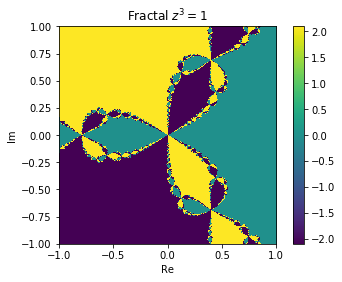

In [17]:
def complexfnc(z):
    return z**(3) - 1            #Our first function

def complexDfnc(z):
    return 3*z**(2)

A1, B1 = eval_newton(complexfnc, complexDfnc, 1024)      

plt.figure(2)
plt.imshow(B1, extent=[-1, 1, -1, 1])     #Simple imshow with the boundary values. 
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Fractal $z^{3}=1$")
plt.colorbar()
plt.show()

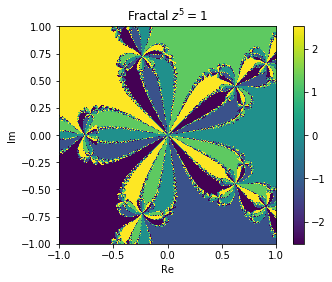

In [18]:
def complexfnc2(z):
    return z**(5) - 1           #Our second function

def complexDfnc2(z):
    return 5*z**(4)

A2, B2 = eval_newton(complexfnc2, complexDfnc2, 1024)



plt.figure(3)
plt.imshow(B2, extent=[-1, 1, -1, 1])
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Fractal $z^{5}=1$")
plt.colorbar()
plt.show()